# The Dataset

The Consumer Behavior and Shopping Habits Dataset provides comprehensive insights into consumers' preferences, tendencies, and patterns during their shopping experiences.This dataset encompasses a diverse range of variables, including demographic information, purchase history, product preferences, shopping frequency, and online/offline shopping behavior.The dataset can be found by clicking  [here](https://www.kaggle.com/datasets/zeesolver/consumer-behavior-and-shopping-habits-dataset/code) .


I will be using the CRISP-DM process and communicate insights through comments and visualization



# 1. Business Understanding

With this rich collection of data from this dataset, I will delve into the intricacies of consumer decision-making processes, aiding businesses in crafting targeted marketing strategies, optimizing product offerings, and enhancing overall customer satisfaction.

## Questions

1. What are the most item purchases at different seosons and why? As business that information is critical to keep the inventory updated on my clients preferences regardless of age, gender etc.

2. I want to find out what influences the frequency of purchase, as a business it is important to have returning customers to garantee the longevity of my business, also are there factors such as free shipping or discount that influence the frequency of purchase
   
3. How do promos and discounts influence the purchasing behavior of consumers? 




# 2.Data Understanding

## Import Libraries

The below liabraries is what i will be using for my data analysis and visialization.I will be reading in one csv file called ```ShoppingBehavior.csv``` and making sure that i can see all columns in the dataset by using the set_option method to display all columns.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import matplotlib.pyplot as plot
import matplotlib.ticker as ticker
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

df=pd.read_csv('ShoppingBehavior.csv')
pd.set_option('display.max_columns',85)

In [3]:
#The colour scheme i will be using the entire notebook for data visualization
palette = ["#CA3542","#27647B","#849FAD","#AEC0C9","#57575F"]

sns.set_style("white")
sns.set_palette(palette)

## Access and Explore 

Looking at the summary data below in the function ```summary(df)```, there are no ```missing values``` on all the columns of the dataset, or ```duplicates```.

In [4]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [5]:
def summary(df):
    "Creating a summarry on one code output of all the unique ,missing, duplicated and data types in my columns"
    print(f"Dataset has {df.shape[1]} features and {df.shape[0]} examples.")
    summary = pd.DataFrame(index=df.columns)
    summary["Unique"] = df.nunique().values
    summary["Missing"] = df.isnull().sum().values
    summary["Duplicated"] = df.duplicated().sum()
    summary["Types"] = df.dtypes
    return summary

summary(df)

Dataset has 18 features and 3900 examples.


,Unique,Missing,Duplicated,Types
Customer ID,3900,0,0,int64
Age,53,0,0,int64
Gender,2,0,0,object
Item Purchased,25,0,0,object
Category,4,0,0,object
Purchase Amount (USD),81,0,0,int64
Location,50,0,0,object
Size,4,0,0,object
Color,25,0,0,object
Season,4,0,0,object


In [6]:
df.describe().T.style.background_gradient(cmap='Blues')

,count,mean,std,min,25%,50%,75%,max
Customer ID,3900.000000,1950.500000,1125.977353,1.000000,975.750000,1950.500000,2925.250000,3900.000000
Age,3900.000000,44.068462,15.207589,18.000000,31.000000,44.000000,57.000000,70.000000
Purchase Amount (USD),3900.000000,59.764359,23.685392,20.000000,39.000000,60.000000,81.000000,100.000000
Review Rating,3900.000000,3.749949,0.716223,2.500000,3.100000,3.700000,4.400000,5.000000
Previous Purchases,3900.000000,25.351538,14.447125,1.000000,13.000000,25.000000,38.000000,50.000000


# 3.Prepare Data

## Feature Addition

Below you  will note  i created a new feature to group the age distribution into bins. There are 3 bins in total which are Young Adult, Middle Aged, and Old Adults, this will be used to classify age groups to better view the age category of the consumers.

In [7]:
# Creating a new column called age group to find out if we can classify variables based on age
def age_group(df):

    df.loc[(df['Age']<=39),'Age Group']='Young Adult'
    df.loc[(df['Age']>39)&(df['Age']<59),'Age Group']='Middle Aged'
    df.loc[(df['Age']>=59),'Age Group']='Old Adults'

    return df
    
df=age_group(df)

In [8]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Age Group
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly,Middle Aged
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly,Young Adult
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly,Middle Aged
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly,Young Adult
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually,Middle Aged


## Exploratory Data Analysis

When looking at the below histogram plots, at glance it looks like  the data is distributed evenly accross the Purchase Amount, Previous Purchases and Review Rating. I will be drilling deeper to look at what other easpects that can distinguish behavior by gender and age.

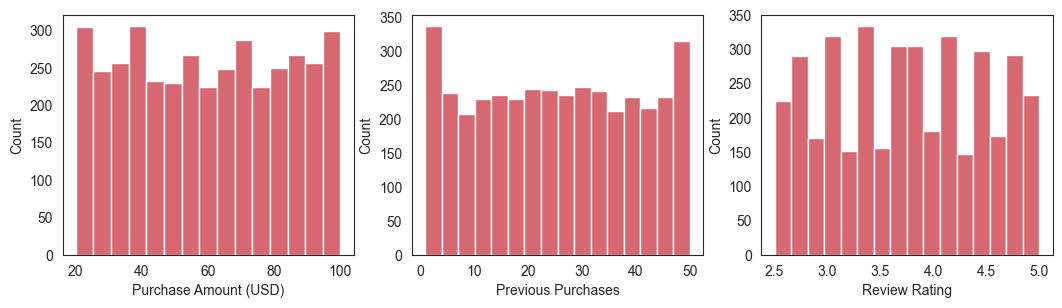

In [9]:
fig, axs = plt.subplots(1, 3, figsize=(11, 3))
a=sns.histplot(data=df,x="Purchase Amount (USD)",ax=axs[0])
a=sns.histplot(data=df,x="Previous Purchases",ax=axs[1])
a=sns.histplot(data=df,x="Review Rating",ax=axs[2])

plt.subplots_adjust(bottom=0.1,top=0.9,hspace=0.4,left=0)

## Age and Gender

From the information in the dataset, it is clear that the majority of the consumers are men which account to 68 percent of the total. The split between Young Adult and Middle Aged is close, the Old Adults age groups contributes the least to the consumer base at these stores 

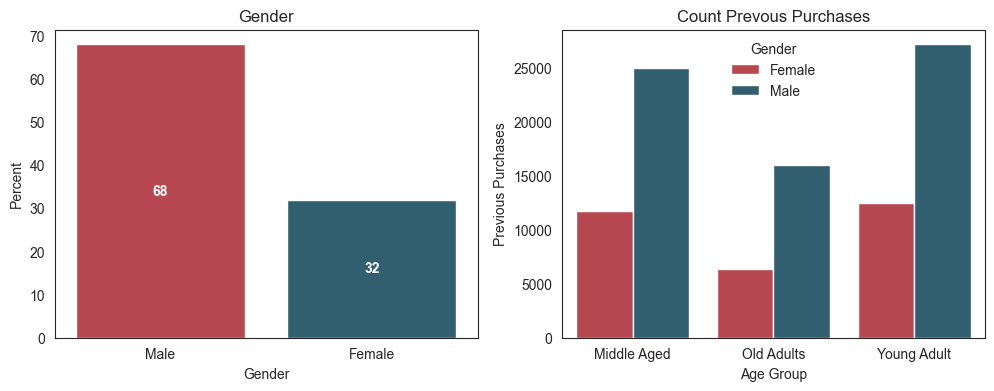

In [22]:
#created to plot the gender, age group and purchase amount
ga=df.groupby(["Gender","Age Group"])[["Purchase Amount (USD)","Previous Purchases"]].sum().reset_index()

#create a sub dataframe to count the gender as percentage
g=df["Gender"].value_counts(normalize=True).rename("Percent").mul(100).reset_index()

fig, axs = plt.subplots(1, 2, figsize=(12, 4))
b=sns.barplot(data=ga,x="Age Group",y="Previous Purchases",hue="Gender",ax=axs[1]);
a=sns.barplot(data=g,x="Gender",y="Percent",ax=axs[0]);
b.set(title="Count Prevous Purchases");
a.set(title="Gender");
b.legend(title="Gender",frameon=False);
for i in a.containers:
    a.bar_label(i,label_type='center',color='white',weight='bold')



## Discount Applied

When the data is grouped by Gender, i noticed that there is no Females who have signed up for Discount during the purchase, there are 63 percent of Males where discount was applied during the purchase. A positive analysis is that where discount was applied there is a high return on prevous purchases

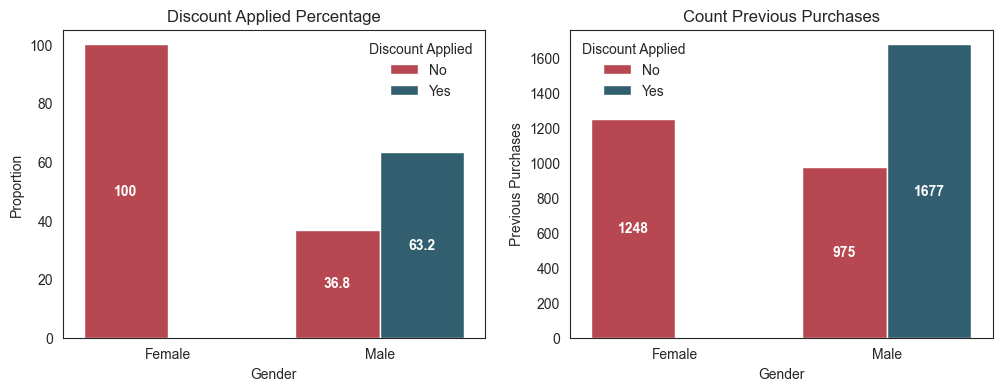

In [24]:

#created to look at the discount distribution per gender
gd=df.groupby(["Gender"])["Discount Applied"].value_counts(normalize=True).mul(100).round(1).rename("Proportion").reset_index()
#created to look at previous purchases based on discount
dp=df.groupby(["Gender","Discount Applied"])["Previous Purchases"].count().reset_index()

fig, axs = plt.subplots(1, 2, figsize=(12, 4))
a=sns.barplot(data=dp,x="Gender",y="Previous Purchases",hue="Discount Applied",ax=axs[1]);
b=sns.barplot(data=gd,x="Gender",y="Proportion",hue="Discount Applied",ax=axs[0]);
b.legend(title="Discount Applied",frameon=False);
a.set(title='Count Previous Purchases');
b.set(title='Discount Applied Percentage');
a.legend(title="Discount Applied",loc='upper left',frameon=False);
for i in a.containers:
    a.bar_label(i,label_type='center',color='white',weight='bold')

for i in b.containers:
    b.bar_label(i,label_type='center',color='white',weight='bold')


## Category

There are four catagories found in the store which are Clothing, Accessories, Footwear and Outerwear. The category with the highest sales and inventory is Clothing which contributes to 44.5 percent of the total inventory 

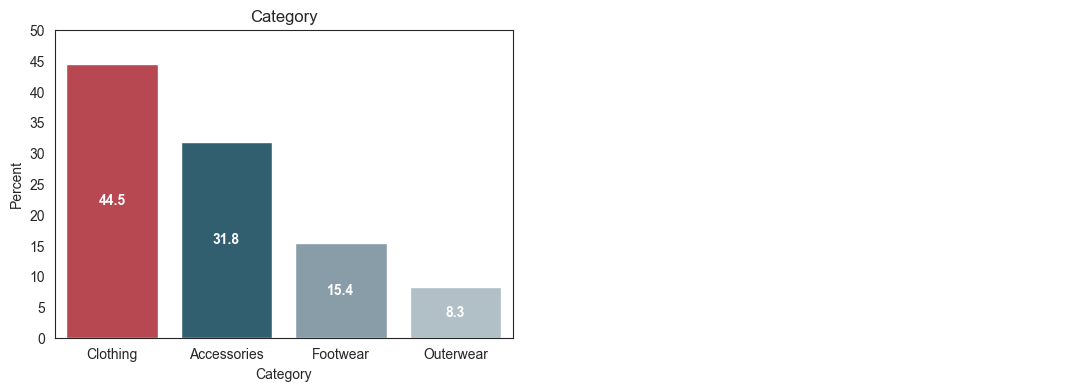

In [12]:

#category of all inventory in store
cc=df["Category"].value_counts(normalize=True).mul(100).round(1).rename("Percent").reset_index()

fig, axs = plt.subplots(1, 2, figsize=(13, 4))
a=sns.barplot(data=cc,x="Category",y="Percent",ax=axs[0]);
a.yaxis.set_major_locator(ticker.MultipleLocator(5))
a.set(ylim=(0,50),title="Category");
axs[1].axis("off");

for i in a.containers:
    a.bar_label(i,label_type='center',color='white',weight='bold')

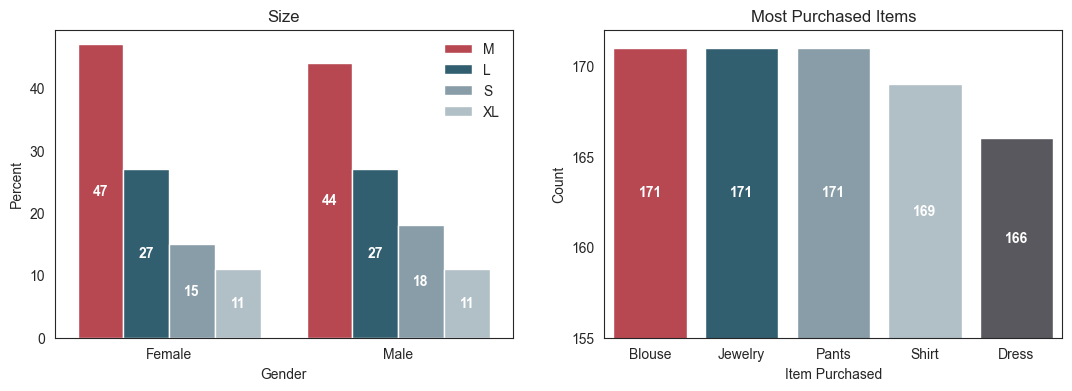

In [13]:
#check size grouped by gender
gs=df.groupby(["Gender"])["Size"].value_counts(normalize=True).mul(100).round(0).rename("Percent").reset_index()
#to check the top 5 most purchased items
ip=df["Item Purchased"].value_counts().rename("Count").reset_index().head(5)

fig, axs = plt.subplots(1, 2, figsize=(13, 4))
a=sns.barplot(data=gs,x="Gender",y="Percent",hue="Size",ax=axs[0]);
b=sns.barplot(data=ip,x="Item Purchased",y="Count",ax=axs[1]);
a.set(title="Size");
b.set(title="Most Purchased Items");
a.legend(frameon=False);
b.yaxis.set_major_locator(ticker.MultipleLocator(5))
b.set(ylim=(155,172));
for i in b.containers:
    b.bar_label(i,label_type='center',color='white',weight='bold')
for i in a.containers:
    a.bar_label(i,label_type='center',color='white',weight='bold')

From the above it is clear that the most purchased item size is medium on both Female and Male followed by large items.What i found interesting is that although the men demoninate the consumer base the most purchased items are a Blouse, Jewlry and Pants which shows that this is not a Male store

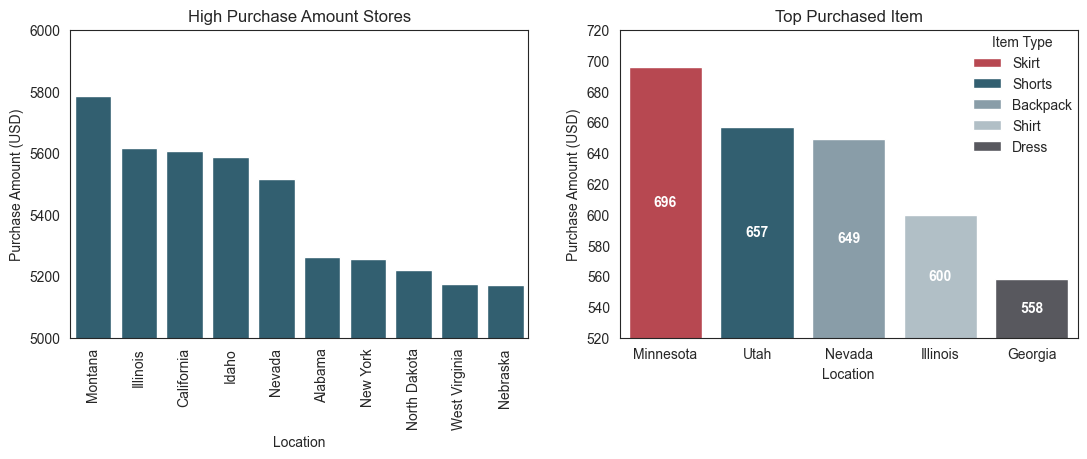

In [14]:
# check the item most purchased and at which store
il=df.groupby(["Item Purchased","Location"])["Purchase Amount (USD)"].sum().sort_values(ascending=False).reset_index().head(5)
#which store has the most purchases
lp=df.groupby('Location')["Purchase Amount (USD)"].sum().sort_values(ascending=False).reset_index().head(10)

fig, axs = plt.subplots(1, 2, figsize=(13, 4))

a=sns.barplot(data=lp,x="Location",y="Purchase Amount (USD)",color="#27647B",ax=axs[0]);
a.yaxis.set_major_locator(ticker.MultipleLocator(200))
a.set(ylim=(5000,6000));
a.set_xticklabels(a.get_xticklabels(),rotation=90);
a.set(title="High Purchase Amount Stores");


b=sns.barplot(data=il,x="Location",y="Purchase Amount (USD)", dodge=False,hue="Item Purchased",ax=axs[1]);
b.legend( loc='upper right',title="Item Type", borderaxespad=0,frameon=False);
b.yaxis.set_major_locator(ticker.MultipleLocator(20))
b.set(title="Top Purchased Item");
b.set(ylim=(520,720));
for i in b.containers:
    b.bar_label(i,label_type='center',color='white',weight='bold')

## Discount

From the above it is noted that the store with the highest amount sales is located in Montana followed by Illinois and California.On the graph on the right it is also noted the stores with the item wih the highest purchase.On research it is found that Utah and Neveda are also tourist attractions and that could also be the reason as to why the most sold items are shorts and backpacks

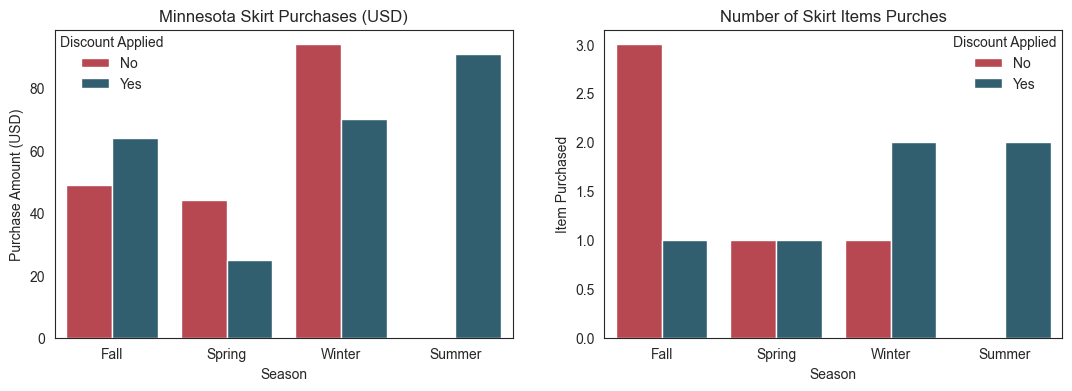

In [15]:
mi=df[(df["Location"]=="Minnesota")&(df["Item Purchased"]=="Skirt")]\
.groupby(["Item Purchased","Discount Applied","Season"])["Purchase Amount (USD)"].mean().round(0).reset_index()

#filter by Minnesota and have a view of how may skirt items were sold
mib=df[(df["Location"]=="Minnesota")&(df["Item Purchased"]=="Skirt")]\
.groupby(["Discount Applied","Season"])["Item Purchased"].count().reset_index()

fig, axs = plt.subplots(1, 2, figsize=(13, 4))

a=sns.barplot(data=mi,x="Season",y="Purchase Amount (USD)",hue="Discount Applied",ax=axs[0]);
a.legend( loc='upper left',title="Discount Applied", borderaxespad=0,frameon=False);
a.set(title="Minnesota Skirt Purchases (USD)");

b=sns.barplot(data=mib,x="Season",y="Item Purchased",hue="Discount Applied",ax=axs[1]);
b.legend( loc='upper right',title="Discount Applied", borderaxespad=0,frameon=False);
b.set(title="Number of Skirt Items Purches");

On the above we are drilling even deeper on the graphs where Minnesota sold the most skirts to find out on what basis were the skirts sold? What i found is that the items were not sold based on Discount, infact what i found it that in the Fall season the purchase amount is higher when the discount applied.Which brings me to the conclusion that the discount applied is not applied to the item amount  

## Frequency

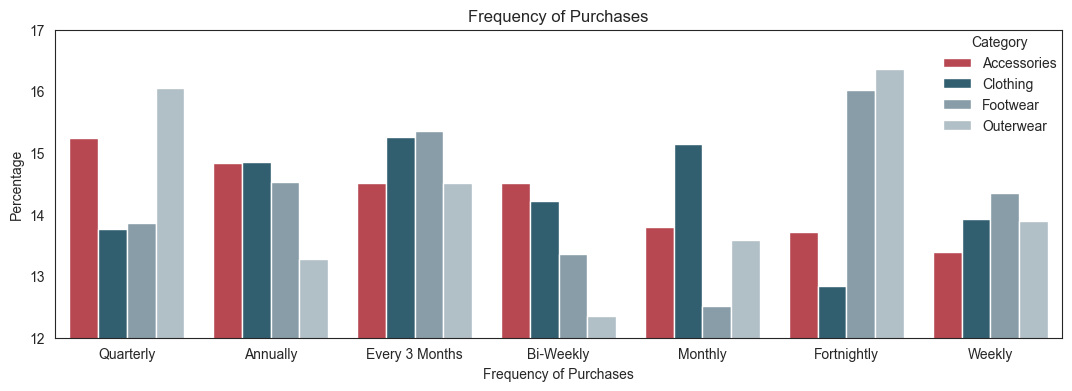

In [16]:
#Frequency of purchase grouped by Category
ca=df.groupby(['Category'])["Frequency of Purchases"].value_counts(normalize=True).mul(100).rename("Percentage").reset_index()

fig, axs = plt.subplots(1, 1, figsize=(13, 4))
a=sns.barplot(data=ca,x="Frequency of Purchases",y="Percentage",hue="Category");
a.yaxis.set_major_locator(ticker.MultipleLocator(1))
a.set(ylim=(12,17));
a.legend( loc='upper right',title="Category", borderaxespad=0,frameon=False);
a.set(title="Frequency of Purchases");

The above is the distribution of the items sold, the margins are close.The margins range between 16.5 percent and 13.5 percent. The items that stand out the most is the Footware and Outerwear Fortnightly sales and Monthly Clothing sales.

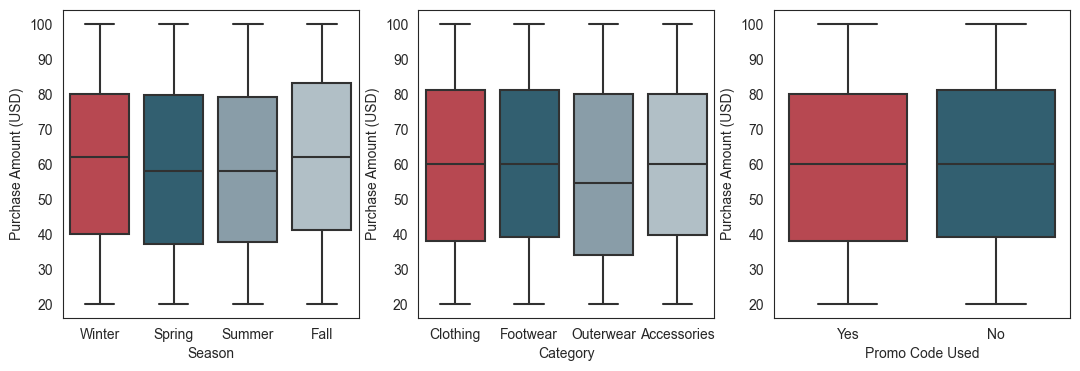

In [17]:
#look at how purchase amount is distributed acrossSeason, Category and Promocode 
fig, axs = plt.subplots(1, 3, figsize=(13, 4))

a=sns.boxplot(data=df,y="Purchase Amount (USD)",x='Season',ax=axs[0])
a=sns.boxplot(data=df,y="Purchase Amount (USD)",x='Category',ax=axs[1])
a=sns.boxplot(data=df,y="Purchase Amount (USD)",x='Promo Code Used',ax=axs[2])

## Rating

In [18]:
#filter by rating lower than 3 to check stores and item with low review
dr=df[(df["Review Rating"]<=3)]\
.groupby("Location")["Item Purchased"].value_counts().rename("Count").sort_values(ascending=False).reset_index().head(10)

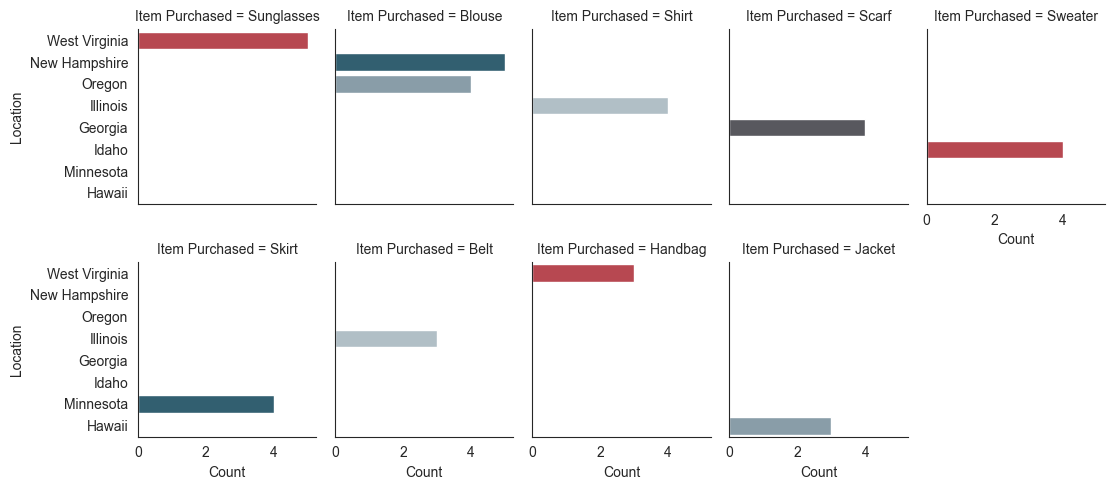

In [19]:

g = sns.catplot(x="Count",y="Location", col="Item Purchased", col_wrap=5, 
                data=dr, 
                kind="bar", height=2.5, aspect=.9,palette=palette)



Above is the distribution of the poor ratings, which are the ratings below 3. There are 8 Locations out of 52 which have concerns regarding poor ratings. The sunglasses in West Virginia for an example were not liked, as they had the highest poor ratings

# Conclusion

On the below points, this is what we have gathered from my analysis.

- Discount does contribute to high number of returning customers of customers that have a high prevous purchase
- If the discount applied had a direct impact on the price of the item being bought, there would be more subscriptions and consumers with returning purchase
- Although the majority of the customers at the store are Male , there is still a high number of female items being bought at the store which is potential for a new untapped market
- Clothing size and category will influence your inventory and to stock up for your store.
- The frequency of purchase varies between different Items Purchased in different categories

The results of this analysis are written up in a Medium blog, click [here](https://medium.com/@mohaumasukela/how-to-influence-consumer-buying-behavior-as-a-business-bd99ba4b552f) to gain access.

# Resources

https://seaborn.pydata.org/generated/seaborn.barplot.html
https://www.geeksforgeeks.org/seaborn-barplot-method-in-python/
https://seaborn.pydata.org/generated/seaborn.catplot.html
https://stackoverflow.com/questions/12555323/how-to-add-a-new-column-to-an-existing-dataframe
https://stackoverflow.com/questions/30328776/how-to-create-a-dataframe-of-summary-statistics
https://pandas.pydata.org/docs/getting_started/intro_tutorials/06_calculate_statistics.html